## Imports

# Two-source Wave Interference Simulation

A.k.a. "Makin' Waves in Cairo!"

We simulate the interference pattern produced by two wave sources with identical frequencies. A "top-view" 2-D intensity map is created to show the wave interference pattern inside a square grid.   


## User Inputs

Only these inputs for now:
- `num_pts` = Number of points along each axis of the square grid
    - Currently `num_pts` must be <= 25
- `f`* = Frequency of sources
    - For example: 509 * 10**17 (FP value equivalent to 0.509) 
- `d`* = Distance between sources 
    - For example: 5 * 10**20 (FP value equivalent to 5)
    - Currently `d` must be <= 10 * 10**20 (FP value equivalent to 10)

    *These are FP (fixed point) values where FP scale is `SCALE_FP` = 10**20.


## Cairo files

**intensity_plot.cairo** contains:
- `intensity_plot_arr`- The external function which accepts user inputs and initiates all calculations
- Other functions to calculate x coordinates, y coordinates, intensities at each position (x, y), and fill arrays for each of these

**wave_physics.cairo** contains functions for wave physics calculations of: 
- Wave function
- Sum of wave functions
- Intensity of combined wave

**math.cairo** contains math functions to use with fixed point quantities: 
- Square root, multiplication, division
- Distance between two points
- Shift any angle `theta` to equivalent angle `theta_shifted` within range `-PI` to `PI`
- Cosine approximation using Taylor series, requires `-PI` <= angle <= `PI`

**structs.cairo** contains struct definitions for: 
- Wave parameters common to both sources
- Wave parameters for an individual source
- Combined parameters for two waves

**constants.cairo** contains: 
- FP math constants
- Other math constants
- Physical wave parameters (except those that are user inputs)
- Plot parameters (except those that are user inputs)


## Tests

**test_intensity_plot.py**
- Contains *input parameters* which are fed into both Cairo and Python calculations
- Contains other constants and parameters (that should match those in **constants.cairo**) for Python calculations 
- Contains Python calculations if intensity array, to compare to Cairo calculations done by calling `intensity_plot_arr` function from **intensity_plot.cairo** using *input parameters*
- Prints for comparison the values (as FP) from the intensity arrays found with Cairo and Python
- To run: `pytest -s test_intensity_plot.py`


**test_intensity_plot.ipynb**
- Jupyter notebook which plots `intensity_s` array calculated by **intensity_plot.cairo**
- Gets data from .json file created in **test_intensity_plot.py** using calculations from **intensity_plot.cairo**
- To run:
    - Install [Jupyter Notebook](https://jupyter.org/install)
    - `jupyter notebook`, follow instructions to open notebook in browser
    - Open file **test_intensity_plot.ipynb**


**test_math.py**
- Compares Python calculations to those found by calling `theta_shifter` and `cosine_8th` functions from **math.cairo**
- Note:
    - `n` = 5 is used to include 5 terms (to 8th order) in Python cosine approximation, to match approximation in `cosine_8th` function in **math.cairo**
    - `num_tests` = an odd number of tests to run
    - Values of `theta` to test are incremented by `PI`/4 in this range:

        *-(`PI`/4)(`num_tests`-1)/2 <= `theta` <= +(`PI`/4)(`num_tests`-1)/2*

- To run: `pytest -s test_math.py`

In [7]:
import json
import numpy as np
import matplotlib.pyplot as plt

## Plot intensity_s array from data in .json file

.json file contains calculations from intensity_plot.cairo, called by test_intensity_plot.py

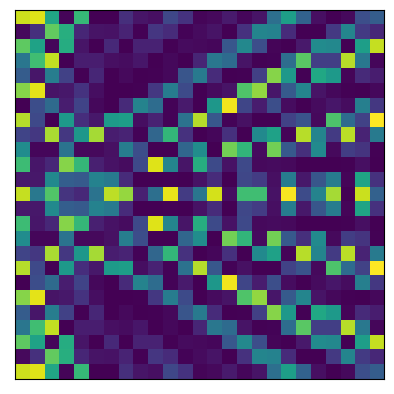

In [8]:
with open('test_intensity_plot.json') as json_file:
    data = json.load(json_file)
    
    # Unpack flattened array
    intensity_array_flattened = np.array(data[0])
    #intensity_array_flattened = data[0]
    
    # Convert to float
    intensity_array_flattened_float = np.array(list(map(float, intensity_array_flattened)))
    
    # Find num_pts = (array length)**0.5
    #              = number of points along each side of desired square array
    intensity_array_flattened_len = len(intensity_array_flattened)
    num_pts = int(np.sqrt(intensity_array_flattened_len))
    
    # Declare empty array with dimensions
    intensity_s = np.empty((num_pts, num_pts))
    
    # Reshape array to dimensions num_pts*num_pts   
    for p in range(0, num_pts):
        for q in range(0, num_pts):
            
            intensity_s[q, p] = intensity_array_flattened_float[q + p * num_pts]
  
    # create a Figure 'fig' and Axes 'ax'
    fig, ax = plt.subplots()
            
    # removes subdivisions (ticks) on axes since [] is empty
    ax.set_xticks([])
    ax.set_yticks([])
    
    ax.imshow(intensity_s, cmap=None)

    plt.show()